#### Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
from scipy import sparse

np.random.seed(21022001)

In [2]:
# Một số hàm hỗ trợ
def plot_data(X, y, W):
  fig, axes = plt.subplots(2, 2, figsize=(15, 12))
  if isinstance(W, list):
    W = W[-1]

  for i in range(2):
    X_ = X[i]
    y_ = y[i]
    classes = np.unique(y_)
    colors = 'bgr'
    shapes = 'xos'

    # Visualize data before predict
    ax = axes[0][i]

    for cl, c, s in zip(classes, colors, shapes):
      ax.scatter(X_[y_ == cl, 0], X_[y_ == cl, 1], c=c, marker=s, edgecolors='k')
    ax.set_title('test' if i else 'train')

    # After predict
    ax = axes[1][i]

    x_min, x_max = X_[:, 0].min() - .5, X_[:, 0].max() + .5
    y_min, y_max = X_[:, 1].min() - .5, X_[:, 1].max() + .5
    h = .025

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    xx1 = xx.ravel().reshape(1, xx.size)
    yy1 = yy.ravel().reshape(1, yy.size)

    XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis=0)

    Z = pred(W, XX)
    Z = Z.reshape(xx.shape)

    for cl, c, s in zip(classes, colors, shapes):
      ax.scatter(X_[y_ == cl, 0], X_[y_ == cl, 1], c=c, marker=s, edgecolors='k')
      ax.contourf(xx, yy, Z, 200, cmap='jet', alpha=.2)
    ax.set_title('test_predict' if i else 'train_predict')

def pred(W, X):
  """
  predict output of each columns of X
  Class of each x_i is determined by location of max probability
  Note that class are indexed by [0, 1, 2, ...., C-1]
  """
  A = softmax(np.dot(W.T, X))
  return np.argmax(A, axis=0)

#### Code here

In [6]:
# Tập iris gồm 3 giống hoa iris được gán nhãn thep thứ tự 0, 1, 2
iris = datasets.load_iris()
# Lấy iris data với 2 features đầu tiên (sepal width và petal width)
# Có thể thử 2 trong 4 features khác của iris data [0, 1, 2, 3]
X = iris.data[:, [2, 3]] # Only take the first 2 features
y = iris.target

# Chia data thành 2 tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

In [7]:
# Chạy tất cả các dòng code trên để import thư viện cần thiết và lấy ra dữ liệu
# Viết ra chương trình áp dụng thuật toán soft max để tính ra Weight (W) từ X_train và y_train

W = []  # Tính weight W này theo X_train và y_train để ra kết quả cuối cùng

################
# YOU CODE HERE
################

def softmax(Z):
  """
  Compute softmax values for each sets of scores in V.
  each column of V is a set of score.
  """
  e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims=True))
  A = e_Z / e_Z.sum(axis = 0)
  return A

# One_hot coding
def convert_labels(y, C):
  """
  convert 1d label to matrix label: each column of this
  matrix corresponding to 1 element in y. In i-th column of y,
  only one non-zeros element located in y[i]-th position,
  and = 1. Ex: y = [0, 2, 1, 0], and 3 classes then return  

            [[1, 0, 0, 1],
             [0, 0, 1, 0],
             [0, 1, 0, 0]]

  """
  Y = sparse.coo_matrix((np.ones_like(y), 
                         (y, np.arange(len(y)))), shape=(C, len(y))).toarray()
  return Y

# Cost function
def cost(X, Y, W):
  A = softmax(np.dot(W.T, X))
  return -np.sum(Y*np.log(A))

def grad(X, Y, W):
  A = softmax(np.dot(W.T, X))
  E = A - Y
  return np.dot(X, E.T)

def check_gradient(g1, g2):
  return np.linalg.norm(g1 - g2) < 1e-6

def softmax_Regression(X, y, W_init, eta, tol, max_count):
  W = [W_init]
  C = W_init.shape[1]
  Y = convert_labels(y, C)
  it = 0
  N = X.shape[1]
  d = X.shape[0]
  count = 0
  check_w_after = 20
  while count < max_count:
    # Mix data
    mix_id = np.random.permutation(N)
    for i in mix_id:
      xi = X[:, i].reshape(d, 1)
      yi = Y[:, i].reshape(C, 1)
      ai = softmax(np.dot(W[-1].T, xi))
      W_new = W[-1] + eta*np.dot(xi, (yi - ai).T)
      count += 1
      # Stopping criteria
      if count % check_w_after == 0:
        if np.linalg.norm(W_new - W[-check_w_after]) < tol:
          return W, count
      W.append(W_new)
  return W, count

def pred(W, X):
  """
  predict output of each columns of X
  Class of each x_i is determined by location of max probability
  Note that class are indexed by [0, 1, 2, ...., C-1]
  """
  A = softmax(np.dot(W.T, X))
  return np.argmax(A, axis=0)

In [8]:
X_t = np.concatenate((np.ones((1, X_train.shape[0])), X_train.T), axis=0)
C = len(np.unique(y_train))

W_init = np.random.randn(X_t.shape[0], C)
W, count = softmax_Regression(X_t, y_train, W_init, .05, 1e-4, 30000)

In [9]:
########################
# Nếu đã tính xong W, chạy tất cả code bên dưới để xem kết quả
########################

#### Visualize

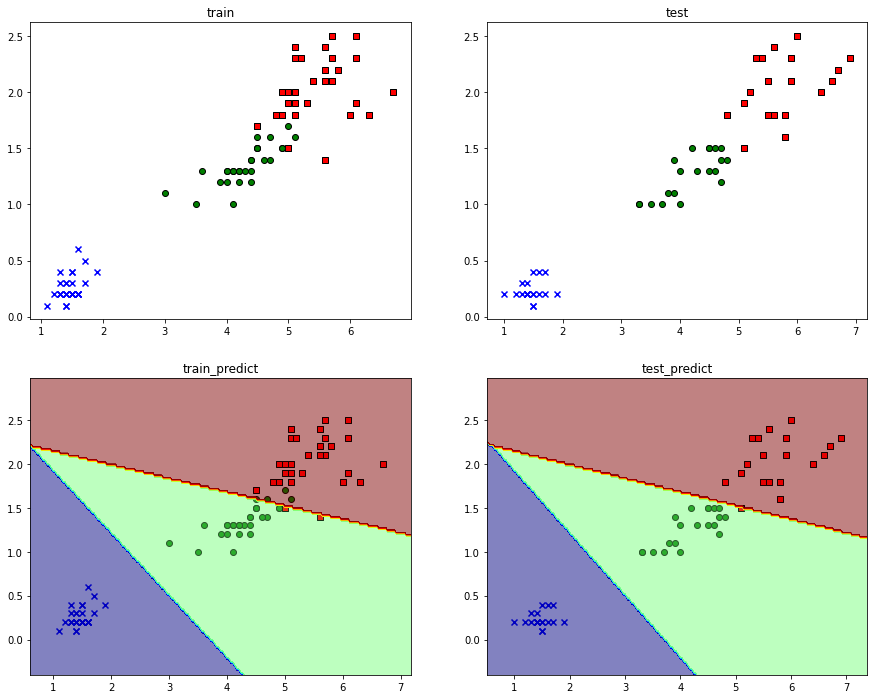

In [10]:
plot_data([X_train, X_test], [y_train, y_test], W)

In [13]:
if isinstance(W, list):
  W = W[-1]

X_test_t = np.concatenate((np.ones((1, X_test.shape[0])), X_test.T), axis=0)
y_pred = pred(W, X_test_t)

results = y_pred == y_test

precision = np.sum(results)/results.shape[0]

print("Your precision %.2f%%" %(precision*100))

Your precision 96.67%
